<a href="https://colab.research.google.com/github/Johnson-lo/-/blob/master/108701007_%E6%87%89%E6%95%B8%E4%B8%89_%E7%BE%85%E5%AD%90%E7%BF%94_%E6%95%B8%E5%80%BC%E5%88%86%E6%9E%90%E7%AC%AC%E4%BA%8C%E6%AC%A1%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finite difference method

$y'' = -y, y(0) = 0, y(\frac{13}{6}\pi) = 4$

$\frac{1}{h^2} y_{k-1}+(1-\frac{1}{h^2})y_k+\frac{1}{h^2}y_{k+1}=0$ for $k = 1, \dots, n-1$

## 1.	Finite element 與 Shooting method 的計算效率哪一個比較高？為什麼？
##Shooting method計算效率較高，因為兩者計算使用finite element的成本遠高於shooting method(大矩陣多數空間浪費在存0，只會有3個值，記憶空間並未有效使用) 
## 2.	Finite element 所需要的矩陣空間要如何降低？我們會用什麼方法來減少矩陣的記憶體需求？
##承上題，用sparse matrix可以有效解決(每個element 指定A矩陣的位置放入，並無將矩陣打開)，替代一個多數為0的大矩陣，藉此減少記憶體的需求。
##3.	如果用 Finite element 來求解，計算量會隨著矩陣大小放大，這時候我們會用哪一個迭代法來求解呢？可以用此迭代法的條件為何？又 本題的 Finite element 有滿足此方法的要求嗎？
##Jocobi method迭代法
##條件:Sparse matrix、上對角矩陣、diagonal dominate(對角元素幾乎都各行和各列的絕對值最大的值)
##有滿足，使用此法可以又快又準又省記憶體


In [10]:
%pylab inline
from scipy.linalg import solve
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['solve']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
def jacobi(A,b,x,n):##導入jacobi method
  D=np.diag(A)
  R=A-np.diagflat(D)
  for i in range(n):
    x=(b-np.dot(R,x))/D
  return x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


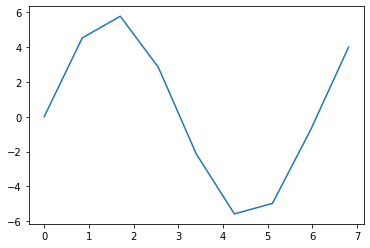

In [21]:
a = 0
b = 13*pi/6
n = 8
x=[1.0,1.0,1.0,1.0,1.0,1.0,1.0]
t = linspace(a,b,n+1)
h = (b-a)/n
A = mat(zeros([n-1,n-1]))
b = mat(zeros([n-1,1]))
guess = array([1.0,1.0])
#first row
A[0,0] = 1-2/h**2
A[0,1] = 1/h**2
#last row
b[n-2,0] = -4/h**2
A[n-2,n-3] = 1/h**2
A[n-2,n-2] = 1-2/h**2

for i in range(1,n-2):
  A[i,i-1] = 1/h**2
  A[i,i] = 1-2/h**2
  A[i,i+1] = 1/h**2

x = jacobi(A,b,x,n)
y=solve(A,b)
y = list(y)
y.append(4)
y = [0]+y
y = array(y)

plot(t,y)

True solution $y(t) = 8sin(t)$

In [22]:
yt = 8*sin(t)

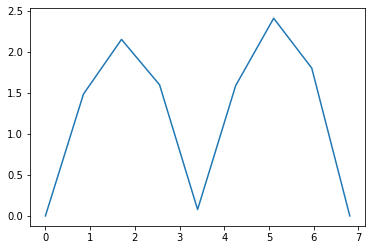

In [23]:
plot(t,abs(y-yt))

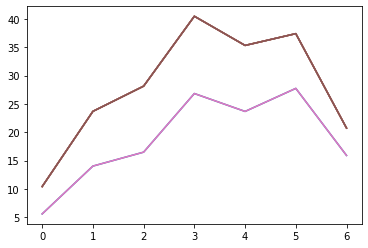

In [24]:
plot(x)

In [25]:
x

matrix([[ 5.56238885, 10.39872543, 10.39872543, 10.39872543, 10.39872543,
         10.39872543,  5.56238885],
        [14.01304236, 23.68571551, 23.68571551, 23.68571551, 23.68571551,
         23.68571551, 14.01304236],
        [16.47661498, 28.14072083, 28.14072083, 28.14072083, 28.14072083,
         28.14072083, 16.47661498],
        [26.83582396, 40.49136253, 40.49136253, 40.49136253, 40.49136253,
         40.49136253, 26.83582396],
        [23.67040092, 35.33450678, 35.33450678, 35.33450678, 35.33450678,
         35.33450678, 23.67040092],
        [27.74457424, 37.41724739, 37.41724739, 37.41724739, 37.41724739,
         37.41724739, 27.74457424],
        [15.89082938, 20.72716596, 20.72716596, 20.72716596, 20.72716596,
         20.72716596, 15.89082938]])

In [26]:
13*pi/6

6.806784082777885